In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DataReader import *
%matplotlib inline

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
r=PdData()

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
dmop=pd.concat([r.get_df_dict(i)['dmop'] for i in [1,2,3,None]], axis=0)

In [5]:
dmop['group'] = dmop['subsystem'].apply(lambda x: x[:4])

## Group individual DMOP commands and count occurences

In [6]:
dmop.groupby(['group','subsystem'])['subsystem'].count().sort_values(ascending=False)

group  subsystem       
AACF   AACFE91A            37317
       AACFE03A            36424
AAAA   AAAAF56A1           20035
APSF   APSF28A1            18312
       APSF38A1            16881
AACF   AACFE05A            16719
AAAA   AAAAF20E1           13440
AMMM   AMMMF10A0           11852
AVVV   AVVV02A0            10073
       AVVV03B0             9774
AACF   AACFM07A             9400
       AACFM06A             9341
AAAA   AAAAF20C1            9205
AACF   AACFM01A             7353
       AACFM02A             7342
APSF   APSF50A2             6869
ATTT   ATTTF030A            6807
AMMM   AMMMF18A0            6783
       AMMMF19A0            6712
ATTT   ATTTF030B            6668
AAAA   AAAAF23G1            6450
APSF   APSF12H1             5593
AAAA   AAAAF57A1            5532
       AAAAF60A1            5530
APSF   APSF32A1             5527
AMMM   AMMMF40C0            4922
       AMMMF23A0            4812
       AMMMF24A0            4783
AAAA   AAAAF93A1            4541
APSF   APSF60B0    

## The following were suspected to be important pairs:

In [7]:
pairs = [['AAAAF40B0','AAAAF40C0'],
        ['AAAAF40E0','AAAAF40F0'],
        ['AAAAF40D0','AAAAF40P0'],
        ['ASSSF01P0', 'ASSSF06P0'],
        ['AACFM01A','AACFM02A'],
        ['AACF325C','AACF325D'],
        ['AMMMF52D3','AMMMF52D4'],
        ['AMMMF18A0','AMMMF40A0'],
        ['AHHHF01P1','AHHHF50A2'],
        ['ATTTF030A', 'ATTTF030B'],
        ['ATTTF321P','ATTTF321R'],
        ['AACFM01A','AACFM02A'],
        ['AMMMF18A0','AMMMF19A0']]

## Inspection of number of occurences

In [8]:
for idx,i in enumerate(pairs):
    print idx,i,(dmop['subsystem']==i[0]).sum(),(dmop['subsystem']==i[1]).sum()

0 ['AAAAF40B0', 'AAAAF40C0'] 3018 3006
1 ['AAAAF40E0', 'AAAAF40F0'] 2304 2305
2 ['AAAAF40D0', 'AAAAF40P0'] 1676 946
3 ['ASSSF01P0', 'ASSSF06P0'] 4344 4339
4 ['AACFM01A', 'AACFM02A'] 7353 7342
5 ['AACF325C', 'AACF325D'] 214 214
6 ['AMMMF52D3', 'AMMMF52D4'] 1675 1675
7 ['AMMMF18A0', 'AMMMF40A0'] 6783 3986
8 ['AHHHF01P1', 'AHHHF50A2'] 1219 2256
9 ['ATTTF030A', 'ATTTF030B'] 6807 6668
10 ['ATTTF321P', 'ATTTF321R'] 1252 1250
11 ['AACFM01A', 'AACFM02A'] 7353 7342
12 ['AMMMF18A0', 'AMMMF19A0'] 6783 6712


Pairs like ['ATTTF030A', 'ATTTF030B'], ['AACFM01A', 'AACFM02A'], and ['AACFM01A', 'AACFM02A'] frequently showed up as important features

## Create 0-1 state assuming the pairs have some sort of on-off significance

In [9]:
p = []
for idx,i in enumerate(pairs):
    p.append(dmop['subsystem'].apply(lambda x: 1 if i[1] in x.split(".")[0] \
                                     else (0 if i[0] in x.split(".")[0] else np.nan)))

    on_off = pd.concat(p, axis=1).fillna(method='ffill').fillna(0)
    on_off.columns=['pair_c_%d'%z for z in range(len(on_off.columns))]

## Inspect visually 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13f77b50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13f685d0>], dtype=object)

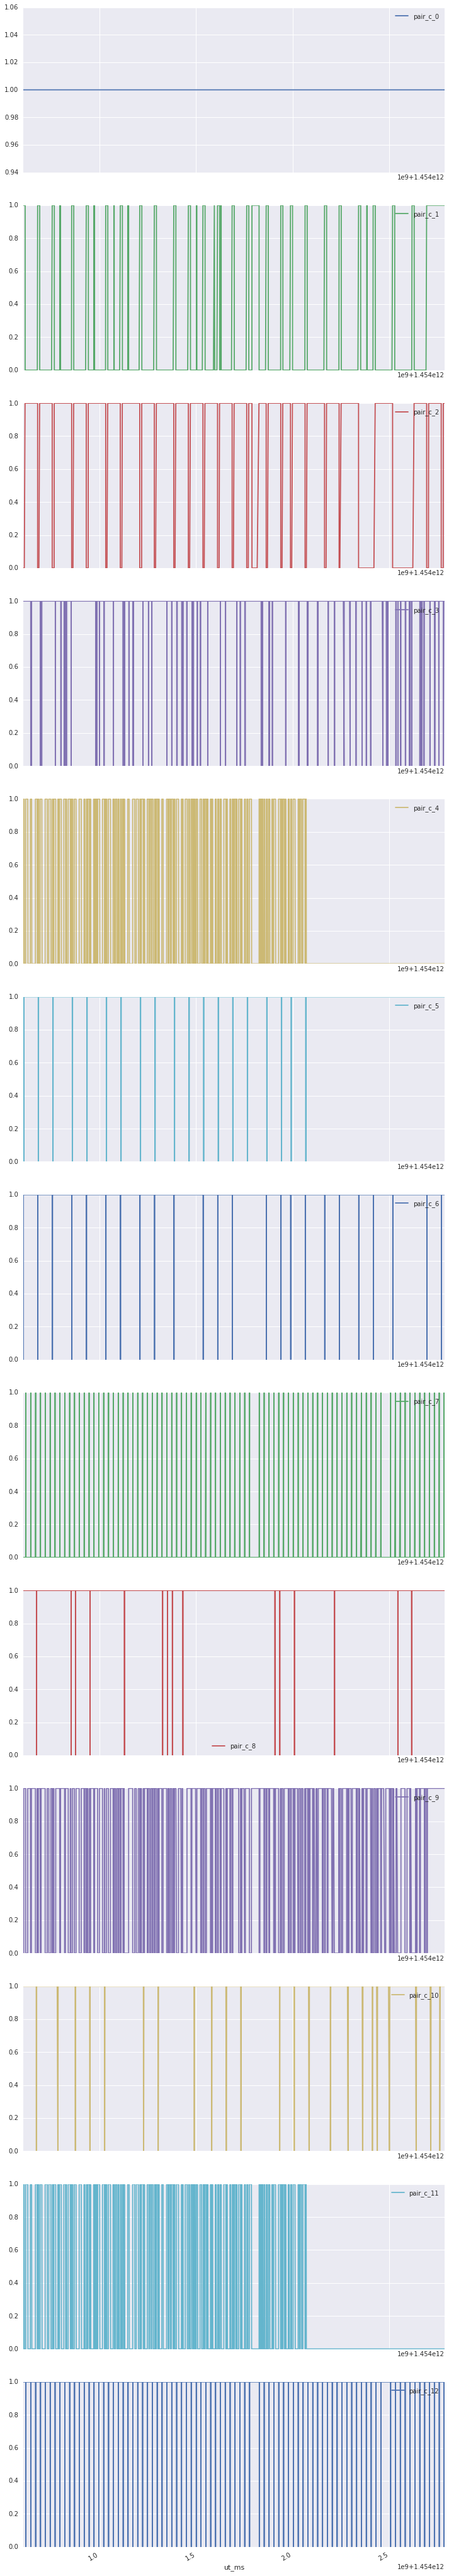

In [11]:
on_off.iloc[-5000:].plot(subplots=True, figsize=(12,80))